# Credit Risk Analysis 
DATA AVAILABLE: Bankloans.csv The data contains the credit details about credit borrowers: Data Description:

age - Age of Customer
ed - Eductation level of customer
employ: Tenure with current employer (in years)
address: Number of years in same address
income: Customer Income
debtinc: Debt to income ratio
creddebt: Credit to Debt ratio
othdebt: Other debts
default: Customer defaulted in the past (1= defaulted, 0=Never defaulted)

# Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

# Loading the Required dataset

In [2]:
data = pd.read_csv('bankloans.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [7]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [10]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

Balancing Data Using Oversampling Minority Class Method

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    517
1.0    183
Name: default, dtype: int64


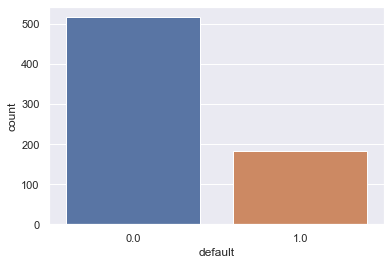

In [11]:
sns.countplot(df['default'])
print(df['default'].value_counts())

In [12]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[df['default']==0]
df_minority = df[df['default']==1]
#upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace=True,n_samples = 517,random_state=0)  #sample with replacement ,to match majority class, reproduction result

In [13]:
#combine majority class with upsampled minortiy class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [14]:
df_upsampled

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
650,53,1,6,7,27,6.4,0.594432,1.133568,1.0
196,24,1,1,0,18,5.9,0.238950,0.823050,1.0
481,24,2,2,3,26,9.7,0.887744,1.634256,1.0
287,38,2,2,16,22,22.7,1.208548,3.785452,1.0
428,23,1,2,1,25,4.5,0.123750,1.001250,1.0
...,...,...,...,...,...,...,...,...,...
694,48,2,6,1,66,12.1,2.315940,5.670060,0.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


1.0    517
0.0    517
Name: default, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


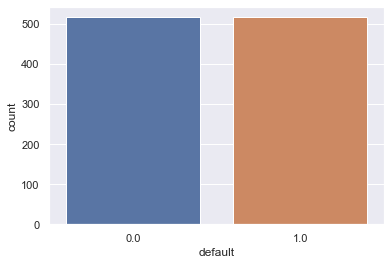

In [15]:
sns.countplot(df_upsampled['default'])
print(df_upsampled['default'].value_counts())

Ckecking For Outliers

<AxesSubplot:xlabel='age'>

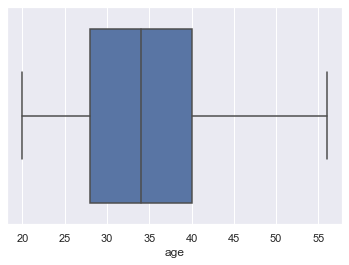

In [16]:
sns.boxplot(x=df_upsampled['age'])

<AxesSubplot:xlabel='employ'>

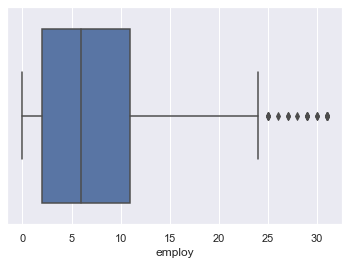

In [17]:
sns.boxplot(x=df_upsampled['employ'])

<AxesSubplot:xlabel='address'>

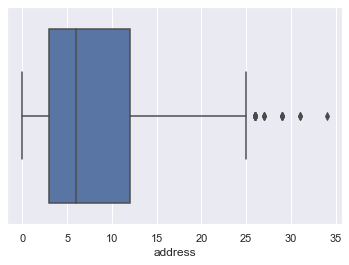

In [18]:
sns.boxplot(x=df_upsampled['address'])

<AxesSubplot:xlabel='income'>

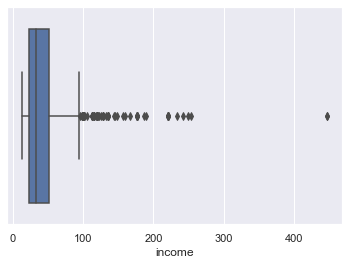

In [19]:
sns.boxplot(x=df_upsampled['income'])

<AxesSubplot:xlabel='debtinc'>

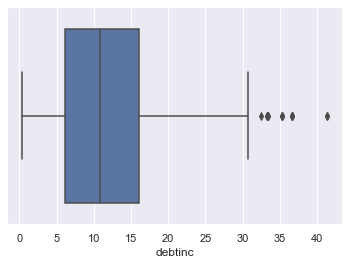

In [20]:
sns.boxplot(x=df_upsampled['debtinc'])

<AxesSubplot:xlabel='creddebt'>

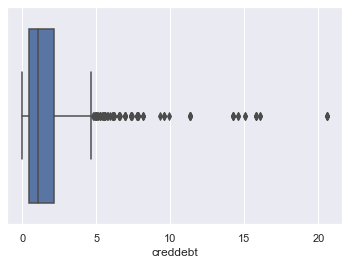

In [21]:
sns.boxplot(x=df_upsampled['creddebt'])

<AxesSubplot:xlabel='othdebt'>

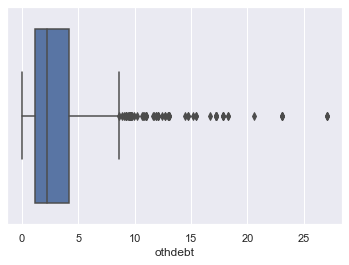

In [22]:
sns.boxplot(x=df_upsampled['othdebt'])

# Removing Outliers Using Z-Score

In [23]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z < 3).all(axis = 1)]
data_clean.shape

(965, 9)

# DataCorellation

<AxesSubplot:>

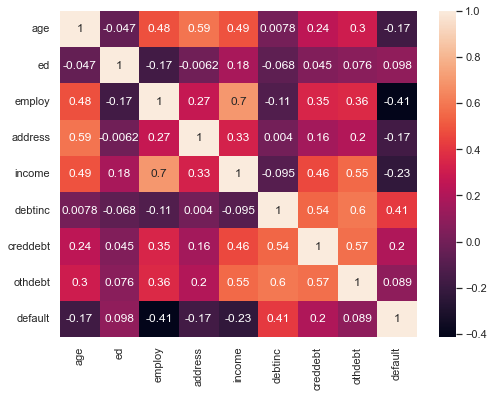

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(data_clean.corr(),fmt='.2g',annot=True)

Correlation Between Class And Other Attributes

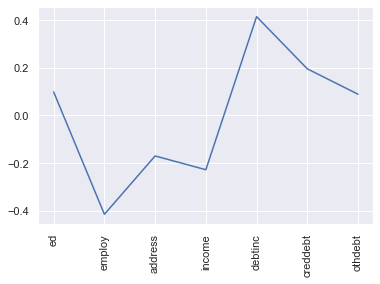

In [25]:
corr = data_clean[data_clean.columns[1:]].corr()['default'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

# Drop Duplicates

In [26]:
data_clean2 = data_clean.drop_duplicates()
data_clean2.shape

(662, 9)

# Exploratory Data Analysis

37


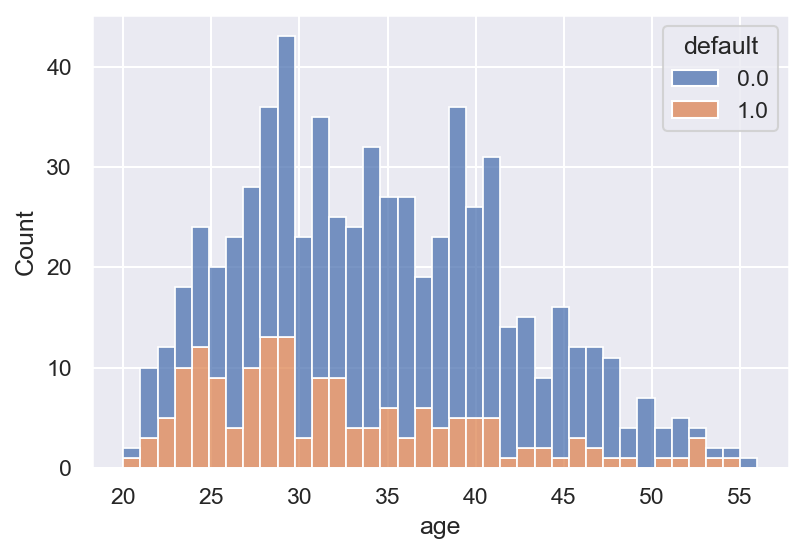

In [27]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='age',hue='default',multiple='stack',bins=37)
print(data_clean2['age'].nunique())

1    359
2    191
3     80
4     32
Name: ed, dtype: int64


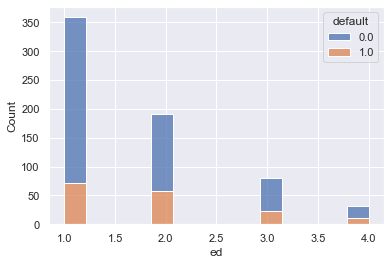

In [28]:
sns.histplot(data=data_clean2,x='ed',hue='default',multiple='stack')
print(data_clean2['ed'].value_counts())

28


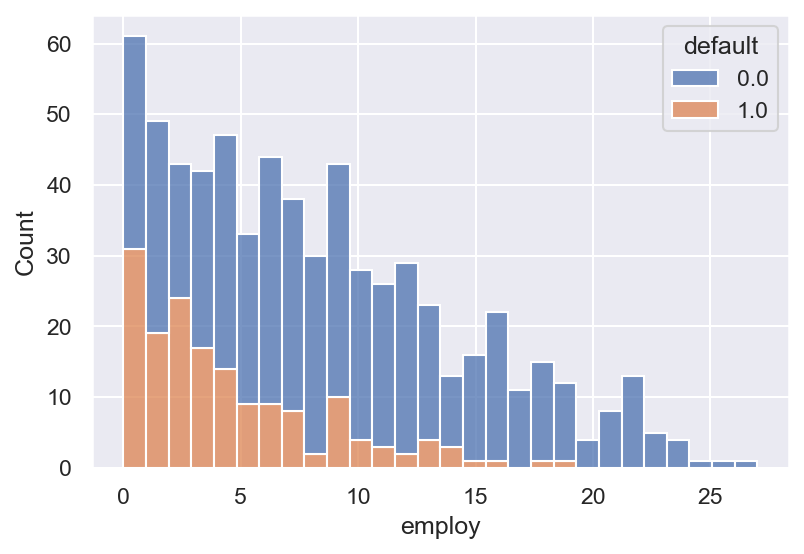

In [29]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='employ',hue='default',multiple='stack',bins=28)
print(data_clean2['employ'].nunique())

28


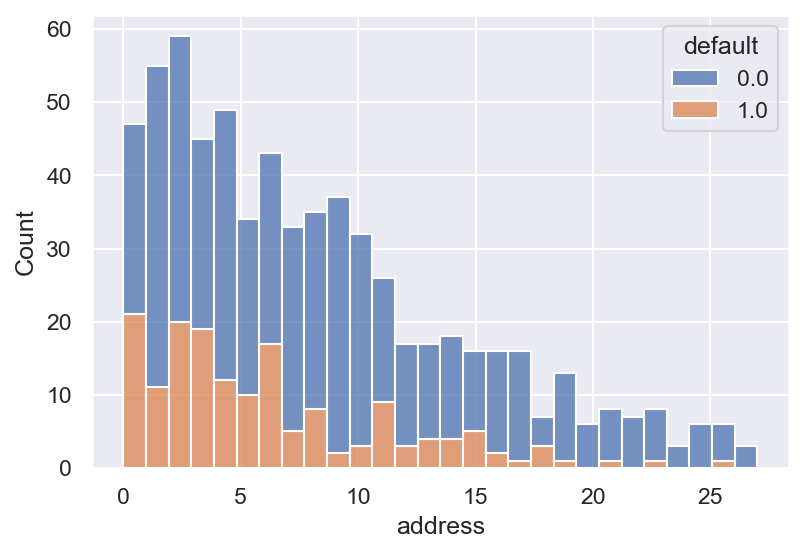

In [30]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='address',hue='default',multiple='stack',bins=28)
print(data_clean2['address'].nunique())

<AxesSubplot:xlabel='income', ylabel='Count'>

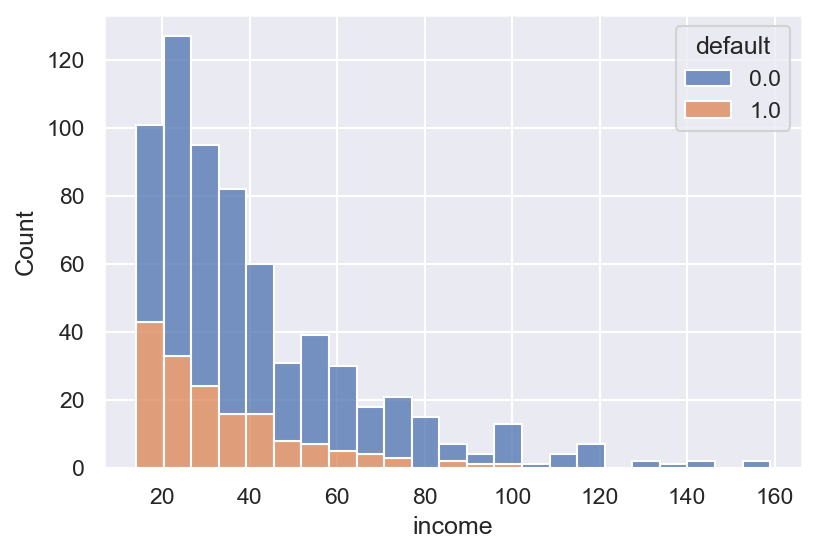

In [31]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='income',hue='default',multiple='stack')
#print(data_clean2['income'].nunique())

<AxesSubplot:xlabel='debtinc', ylabel='Count'>

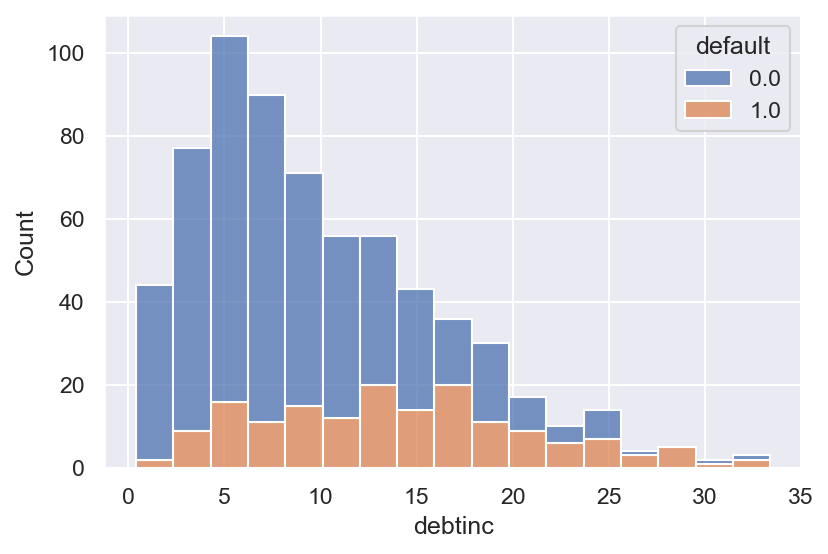

In [32]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='debtinc',hue='default',multiple='stack')
#print(data_clean2['debtinc'].nunique())

<AxesSubplot:xlabel='creddebt', ylabel='Count'>

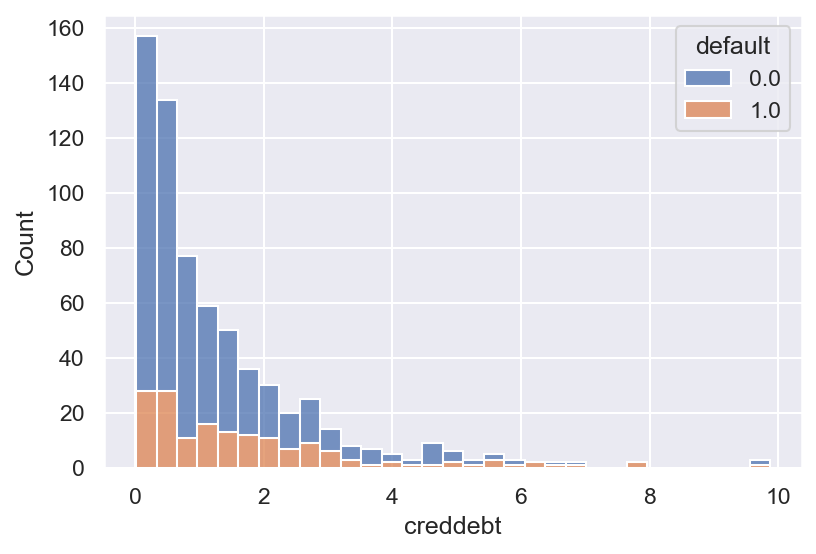

In [33]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='creddebt',hue='default',multiple='stack')
#print(data_clean2['creddebt'].value_counts())

<AxesSubplot:xlabel='othdebt', ylabel='Count'>

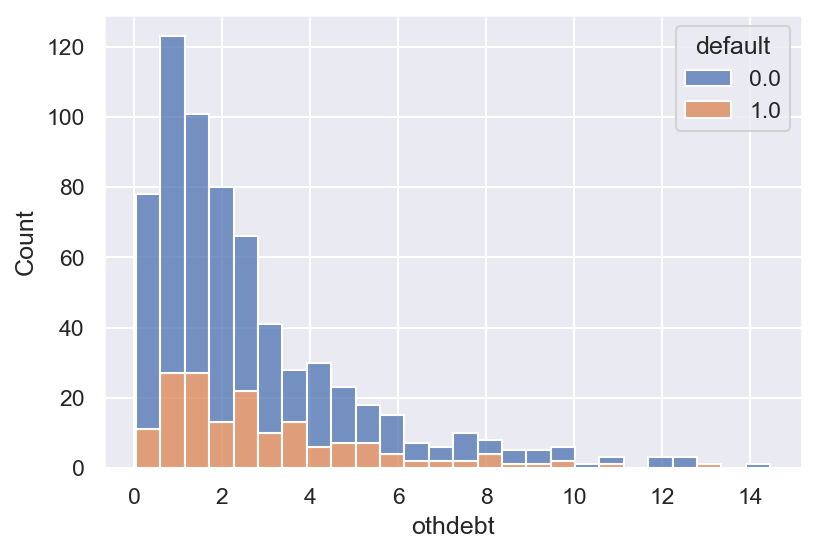

In [34]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=data_clean2,x='othdebt',hue='default',multiple='stack')
#print(data_clean2['othdebt'].nunique())

In [35]:
data_clean2['ed'].value_counts()

1    359
2    191
3     80
4     32
Name: ed, dtype: int64

# Train Test Split Method

In [36]:
x = data_clean2.drop('default',axis=1)
y = data_clean2['default']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
x_train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
308,26,1,10,1,25,7.1,1.306400,0.468600
150,45,2,15,14,51,18.1,1.550808,7.680192
689,30,1,4,2,18,10.7,0.227268,1.698732
642,31,2,6,5,25,11.5,2.331625,0.543375
421,43,2,16,10,83,4.1,0.258628,3.144372


In [39]:
y_train.head()

308    0.0
150    0.0
689    0.0
642    0.0
421    0.0
Name: default, dtype: float64

In [40]:
x_test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
518,41,1,7,22,32,2.9,0.072384,0.855616
323,38,1,0,8,23,8.1,0.897966,0.965034
617,29,2,6,7,18,5.1,0.449820,0.468180
497,44,2,12,5,86,13.0,1.475760,9.704240
178,37,1,13,5,24,8.9,0.602352,1.533648


In [41]:
y_test.head()

518    0.0
323    1.0
617    1.0
497    0.0
178    0.0
Name: default, dtype: float64

# Random Forest

In [42]:
from sklearn.ensemble import  RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred = rfc.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score: 80.45 %


In [44]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('f-1 Score:',(f1_score(y_test,y_pred)))
print('precision score:',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

f-1 Score: 0.5357142857142857
precision score: 0.6818181818181818
Recall Score : 0.4411764705882353


# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred = lr.predict(x_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 79.7 %


In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('f-1 Score:',(f1_score(y_test,y_pred)))
print('Precision Score:',(precision_score(y_test,y_pred)))
print('Recall Score:',(recall_score(y_test,y_pred)))

f-1 Score: 0.5573770491803278
Precision Score: 0.6296296296296297
Recall Score: 0.5


# K-Fold Cross Validation Method

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits = 5,random_state=0,shuffle=True)

In [49]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=0)
x_under ,y_under = under.fit_resample(x_train,y_train)
y_under.value_counts()

0.0    129
1.0    129
Name: default, dtype: int64

# Random Forest

In [50]:
#pip install imblearn

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
scores = cross_val_score(rfc,x_under,y_under,cv = cv,scoring = 'accuracy')
print("Accuracy:",round(np.mean(scores)*100,2),"%")

Accuracy: 75.57 %


In [57]:
rfc.fit(x_under,y_under)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precisoin score:',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))


F-1 Score : 0.5909090909090909
Precisoin score: 0.48148148148148145
Recall Score : 0.7647058823529411


# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
scores =cross_val_score(lr,x_under,y_under,cv =cv,scoring = 'accuracy')
print('Accuracy:',round(np.mean(scores)*100,2),"%")

Accuracy: 76.36 %


In [61]:
lr.fit(x_under,y_under)
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('f-1 score:',(f1_score(y_test,y_pred)))
print('precision score:',(precision_score(y_test,y_pred)))
print('recall score:',(recall_score(y_test,y_pred)))

f-1 score: 0.5842696629213483
precision score: 0.4727272727272727
recall score: 0.7647058823529411
